In [1]:
import pandas as pd
import numpy as np

%store -r MEW2021
MEW2021

,Day,BZN|IE(SEM) > BZN|GB [MW],BZN|GB > BZN|IE(SEM) [MW]
0,01.01.2021 00:00 - 01.01.2021 01:00,9007.0,63.0
1,02.01.2021 00:00 - 02.01.2021 01:00,765.0,1263.0
2,03.01.2021 00:00 - 03.01.2021 01:00,1095.0,2940.0
3,04.01.2021 00:00 - 04.01.2021 01:00,726.0,6429.0
4,05.01.2021 00:00 - 05.01.2021 01:00,140.0,9081.0
...,...,...,...
360,27.12.2021 00:00 - 27.12.2021 01:00,2852.0,2721.0
361,28.12.2021 00:00 - 28.12.2021 01:00,2157.0,7092.0
362,29.12.2021 00:00 - 29.12.2021 01:00,11024.0,678.0
363,30.12.2021 00:00 - 30.12.2021 01:00,1615.0,5191.0


In [2]:
%store -r MEW2022
MEW2022

,Day,BZN|IE(SEM) > BZN|GB [MW],BZN|GB > BZN|IE(SEM) [MW]
0,01.01.2022 00:00 - 01.01.2022 01:00,6277.0,860.0
1,02.01.2022 00:00 - 02.01.2022 01:00,3925.0,1252.0
2,03.01.2022 00:00 - 03.01.2022 01:00,4596.0,1669.0
3,04.01.2022 00:00 - 04.01.2022 01:00,1853.0,6226.0
4,05.01.2022 00:00 - 05.01.2022 01:00,183.0,14730.0
...,...,...,...
360,27.12.2022 00:00 - 27.12.2022 01:00,NaN,NaN
361,28.12.2022 00:00 - 28.12.2022 01:00,NaN,NaN
362,29.12.2022 00:00 - 29.12.2022 01:00,NaN,NaN
363,30.12.2022 00:00 - 30.12.2022 01:00,NaN,NaN


In [3]:
MEWFlows = pd.concat([MEW2021["BZN|IE(SEM) > BZN|GB [MW]"], MEW2022["BZN|IE(SEM) > BZN|GB [MW]"]], ignore_index=True).to_frame("BZN|IE(SEM) > BZN|GB [MW]")
MEWFlows["BZN|GB > BZN|IE(SEM) [MW]"] = pd.concat([MEW2021["BZN|GB > BZN|IE(SEM) [MW]"], MEW2022["BZN|GB > BZN|IE(SEM) [MW]"]], ignore_index=True).to_frame("BZN|GB > BZN|IE(SEM) [MW]")

MEWFlows["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "BZN|IE(SEM) > BZN|GB [MW]", "BZN|GB > BZN|IE(SEM) [MW]"]

MEWFlows = MEWFlows.reindex(columns=NewOrder)

MEWFlows

,Date,BZN|IE(SEM) > BZN|GB [MW],BZN|GB > BZN|IE(SEM) [MW]
0,2021-01-01,9007.0,63.0
1,2021-01-02,765.0,1263.0
2,2021-01-03,1095.0,2940.0
3,2021-01-04,726.0,6429.0
4,2021-01-05,140.0,9081.0
...,...,...,...
725,2022-12-27,NaN,NaN
726,2022-12-28,NaN,NaN
727,2022-12-29,NaN,NaN
728,2022-12-30,NaN,NaN


(18595.05, 19319.95)


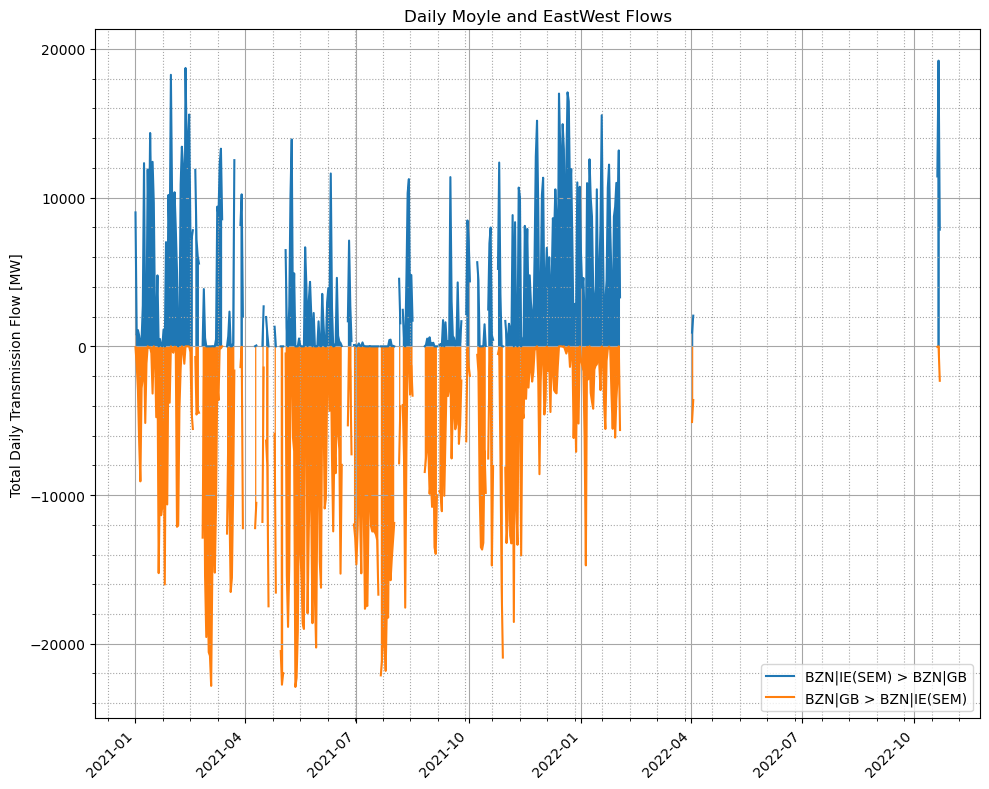

In [4]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import math

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Daily Moyle and EastWest Flows')
plt.ylabel('Total Daily Transmission Flow [MW]')

Mean = (MEWFlows["BZN|IE(SEM) > BZN|GB [MW]"] - MEWFlows["BZN|GB > BZN|IE(SEM) [MW]"])/math.sqrt(2)

ax.plot(MEWFlows["Date"], MEWFlows["BZN|IE(SEM) > BZN|GB [MW]"], label="BZN|IE(SEM) > BZN|GB")
ax.plot(MEWFlows["Date"], -MEWFlows["BZN|GB > BZN|IE(SEM) [MW]"], label="BZN|GB > BZN|IE(SEM)")
#ax.plot(MEWFlows["Date"], Mean, label="RMS", color='black')


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
#plt.xlim(18591.55, 19379.8)
plt.tight_layout()

plt.fill_between(MEWFlows["Date"], MEWFlows["BZN|IE(SEM) > BZN|GB [MW]"])
plt.fill_between(MEWFlows["Date"], -MEWFlows["BZN|GB > BZN|IE(SEM) [MW]"])

plt.show()

In [5]:
%store MEWFlows
del MEWFlows

Stored 'MEWFlows' (DataFrame)
